In [1]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot  as plt
%matplotlib inline

grid = np.random.randint(0,1000, size=10000)
grid = grid.reshape(100,100)
ix = np.random.randint(0,100,size=300)
iy = np.random.randint(0,100, size=300)
# size = min(len(ix),len(iy))
# ix , iy = ix[:size], iy[:size]
station = np.random.randint(5,1000,size=300)
grid_station = grid[iy,ix]

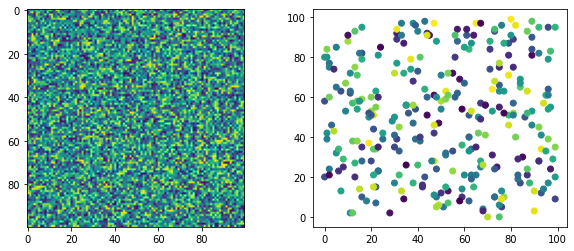

In [2]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.imshow(grid)
plt.subplot(122)
plt.scatter(ix,iy,c=station)

In [3]:
pdf_station = st.norm.pdf(station,loc=np.mean(station),scale=np.std(station)) # 返回每个数据点累计概率
pdf_grid = st.norm.pdf(grid,loc=np.mean(grid),scale=np.std(grid))

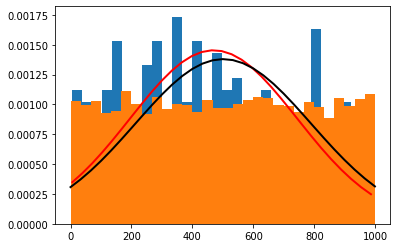

In [4]:
# 站点分布
count, bins, ignored = plt.hist(station, 30, density=True)
mu= np.mean(station)
sigma = np.std(station)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='r')

# 格点分布
count, bins, ignored = plt.hist(grid.ravel(), 30, density=True)
mu= np.mean(grid.ravel())
sigma = np.std(grid.ravel())
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),linewidth=2, color='k')

In [5]:
pdf_grid_station = pdf_grid[iy,ix]
delta = np.zeros(pdf_grid_station.shape)
for i, prob in enumerate(pdf_grid_station):
    for j , prob_true in enumerate(pdf_station):
        if abs(prob-prob_true)<0.001:
            delta[i]=grid_station[i]-station[j]
            break

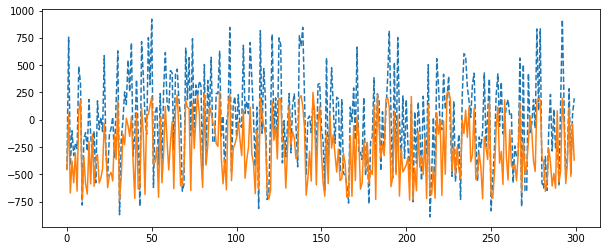

In [6]:
plt.figure(figsize=(10,4))
plt.plot(grid_station-station, '--')
plt.plot(delta)